In [1]:
# Data Imports
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [2]:
# Math
import math

# Plot imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
# Machine Learning Imports
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
# For Evaluating Results
from sklearn import metrics

In [5]:
# Dataset Import
import statsmodels.api as sm

Text(0.5,1,'Logistic Function')

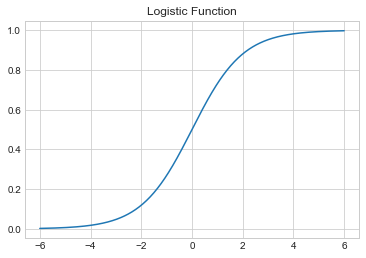

In [6]:
# Drawing Logistic Function

def logistic(t):
    return 1.0/ (1+math.exp((-1.0)*t))
# Set t from -6 to 6 (500 elements, linearly spaced)
t = np.linspace(-6,6,500)

# Set up y values (using list comprehension)
y = np.array([logistic(ele) for ele in t])

# Plot
plt.plot(t,y)
plt.title('Logistic Function')

In [7]:
df = sm.datasets.fair.load_pandas().data

In [8]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [11]:
# Defining a function to convert the target value to binary outcome
# ! sign means not equal to.

def affair_check(x):
    if x != 0:
        return 1
    else:
        return 0

In [12]:
# Adding a variable called "Had_Affair with new binary values" 

df['Had_Affair'] = df['affairs'].apply(affair_check)

In [13]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_Affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [14]:
df.groupby('Had_Affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
Had_Affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


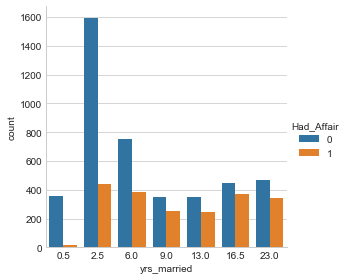

In [15]:
# Here we have taken one variable only "Yrs_married" and we used kind = count which provides count of yrs married cases. 
# Hue represents data filter "Had Affair"

sns.factorplot('yrs_married',data=df,kind='count',hue='Had_Affair')

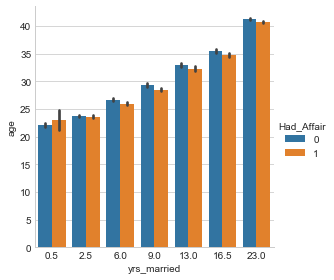

In [16]:
# https://www.youtube.com/watch?v=yWYWmeuH7no
sns.factorplot(x='yrs_married',y='age',data=df,hue='Had_Affair',kind='bar')

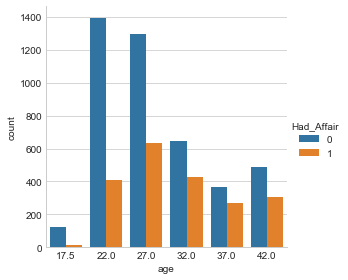

In [17]:
# https://www.youtube.com/watch?v=yWYWmeuH7no
sns.factorplot('age',data=df,kind='count',hue='Had_Affair')

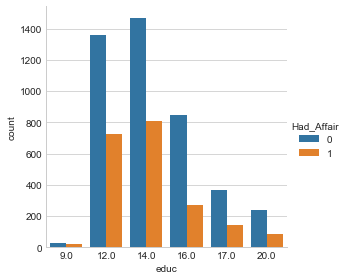

In [18]:
sns.factorplot('educ',data=df,kind='count',hue='Had_Affair')

In [19]:
# Use of get_dummies method
occ_dummies = pd.get_dummies(df['occupation'])

In [20]:
occ_dummies.head()

,1.0,2.0,3.0,4.0,5.0,6.0
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0


In [21]:
# hus_occ - Husband Occupation
hus_occ_dummies = pd.get_dummies(df['occupation_husb'])

In [22]:
occ_dummies.head()

,1.0,2.0,3.0,4.0,5.0,6.0
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0


In [23]:
occ_dummies.columns = ['occ1','occ2','occ3','occ4','occ5','occ6']

In [24]:
occ_dummies.columns = ['hocc1','hocc2','hocc3','hocc4','hocc5','hocc6']

In [25]:
X = df.drop(['occupation','occupation_husb','Had_Affair'],axis=1)

In [26]:
dummies = pd.concat([occ_dummies,hus_occ_dummies],axis=1)

In [27]:
dummies.head()

,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6,1.0,2.0,3.0,4.0,5.0,6.0
0,0,1,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,1,0,0


In [28]:
X = pd.concat([X,dummies],axis=1)

In [29]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6,1.0,2.0,3.0,4.0,5.0,6.0
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,0,1,0,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0,0,1,0,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0,0,1,0,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0,0,0,0,1,0,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0,0,1,0,0,0,0,0,0,1,0,0


In [30]:
Y = df.Had_Affair

Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Had_Affair, dtype: int64

In [31]:
# Taking care of Multicolliniarity
X =X.drop('hocc1',axis=1)

In [32]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,hocc2,hocc3,hocc4,hocc5,hocc6,1.0,2.0,3.0,4.0,5.0,6.0
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,1,0,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0,1,0,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0,1,0,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0,0,0,1,0,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0,1,0,0,0,0,0,0,1,0,0


In [33]:
X = X.drop('affairs',axis=1)

In [34]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,hocc2,hocc3,hocc4,hocc5,hocc6,1.0,2.0,3.0,4.0,5.0,6.0
0,3.0,32.0,9.0,3.0,3.0,17.0,1,0,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,0,1,0,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,0,1,0,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0,0,0,1,0,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,0,1,0,0,0,0,0,0,1,0,0


In [35]:
# flatten the array

Y = np.ravel(Y)

In [36]:
Y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [37]:
log_model = LogisticRegression()

log_model.fit(X,Y)

log_model.score(X,Y)

0.7260446120012567

In [ ]:
#72% is the accuracy of the model here

In [38]:
Y.mean()

0.3224945020420987

In [39]:
coeff_df = DataFrame(list(zip(X.columns,np.transpose(log_model.coef_))))

In [45]:
# Coeffients of the model
coeff_df

,0,1
0,rate_marriage,[-0.6982334974001132]
1,age,[-0.05648126997028928]
2,yrs_married,[0.10411563182022601]
3,children,[0.01812869627128602]
4,religious,[-0.3684648186015166]
5,educ,[0.0077524736611677214]
6,hocc2,[0.25082723607602375]
7,hocc3,[0.5600233666975847]
8,hocc4,[0.2997329916589914]
9,hocc5,[0.893841824018235]


In [40]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y)

In [41]:
log_model2 = LogisticRegression()
log_model2.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [42]:
class_predict = log_model2.predict(X_test)

In [43]:
print (metrics.accuracy_score(Y_test,class_predict))

0.7242462311557789


In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [45]:
logreg= LogisticRegression()

# Split data in training and testing

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size= 0.4,random_state=3)

In [46]:
logreg.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [47]:
from sklearn import metrics


In [48]:
Y_pred = logreg.predict(X_test)

In [49]:
Y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [51]:
print(metrics.accuracy_score(Y_test,Y_pred))

0.7173144876325088
